In [1]:
import random as ran
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math

In [2]:
h=1
tmax=100
tpoints=np.arange(0,tmax+1,h)

sample=10000
s_points=np.arange(0,sample+1,h)

In [3]:
first=1
p_same=3/4
p_change=1/4

In [4]:
ele=first
pos=first
position=[]

In [5]:
up=2
down=-2
right=1
left=-1

In [6]:
# loop for capture possibility
for i in s_points:
    position.append(pos)
    ele = 1
    # 2nd move        
    if ran.random() > p_change:
        ele += right
        test = right
    else:
        if ran.random() > 1/2:
            ele += 0*up
            test = up
        else:
            ele += 0*down
            test = down
    # 3rd move  
    if test == right:
        if ran.random() > p_change:
            ele += right
            test = right
        else:
            if ran.random() > 1/2:
                ele += 0*up
                test = up
            else:
                ele += 0*down
                test = down
    else:
        if test == up:
            if ran.random() > p_change:
                ele += 0*up
                test = up
            else:
                if ran.random() > 1/2:
                    ele += left
                    test = left
                else:
                    ele += right
                    test = right
        else:
            if test == down:
                if ran.random() > p_change:
                    ele += 0*down
                    test = down
                else:
                    if ran.random() > 1/2:
                        ele += left
                        test = left
                    else:
                        ele += right
                        test = right
        # 4th and later move
        for t in range(3,tmax+1):
            if test == right:
                if ran.random() > p_change:
                    ele += right
                    test = right
                else:
                    if ran.random() > 1/2:
                        ele += 0*up
                        test = up
                    else:
                        ele += 0*down
                        test = down
            else:
                if test == up:
                    if ran.random() > p_change:
                        ele += 0*up
                        test = up
                    else:
                        if ran.random() > 1/2:
                            ele += left
                            test = left
                        else:
                            ele += right
                            test = right
                else:
                    if test == down:
                        if ran.random() > p_change:
                            ele += 0*down
                            test = down
                        else:
                            if ran.random() > 1/2:
                                ele += left
                                test = left
                            else:
                                ele += right
                                test = right
                    else:
                        if test == left:
                            if ran.random() > p_change:
                                ele += left
                                test = left
                            else:
                                if ran.random() > 1/2:
                                    ele += 0*up
                                    test = up
                                else:
                                    ele += 0*down
                                    test = down
    pos = ele


In [7]:
print(position)

[1, 3, 3, 3, 12, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, -13, 3, 2, 32, 3, 3, 3, 3, 13, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 18, 3, 3, 3, 2, 3, 2, 25, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 11, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 24, 2, 2, 16, 3, 3, 3, 3, 11, -5, 3, 2, 3, -15, 2, 3, 3, 2, 3, 3, 2, -15, 3, 3, 3, 3, 3, 3, 3, -21, 2, 3, 2, 3, 3, 2, 3, -13, -13, 7, 3, 3, 2, -15, 3, -30, 2, -4, 14, 2, 2, 2, 3, 2, -5, 19, 2, 2, 16, 3, 3, 3, 3, 3, 2, 3, -21, 2, 3, 51, 3, 3, -20, 3, 3, -22, 2, -15, 3, 3, 7, 3, 3, 0, 7, 3, 2, 3, 3, 3, 3, 2, 35, 18, 2, 16, 2, 3, -30, 3, 2, 3, 3, 3, 3, 25, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, -23, 2, 0, 3, 3, 3, 3, 3, -3, 3, 20, 3, 3, -2, 3, 2, -32, -5, 2, 3, 3, 3, 2, 14, 2, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, -14, 3, 19, 19, 2, 10, 3, 3, 30, 3, -11, -9, 3, 2, 3, -10, 3, 2, 3, 2, 2, 2, 2, 3, 2, 4, 3, 3, 3, 7, 3, 3, 2, 3, -13, 3, 3, 3, 2, 3, 3, 3, 14, 3, 3, 2, 3, 3, -18, 3, 3, 3, 2, 5, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 9, 3, 3, 2, 3

In [8]:
position=position[1:sample+1]
print(len(position))

10000


In [9]:
reactor=[]
capture=[]
through=[]

num_r=0
num_c=0
num_t=0

size=np.arange(0,tmax+1,h)
print(len(size))

101


In [10]:
for j in range(tmax+1):
    reactor.append(num_r)
    capture.append(num_c)
    through.append(num_t)
    x = size[j]
    nt=0
    nc=0
    nr=0
    for i in range(sample):
        if position[i] > x:
            nt += 1
        elif position[i] > 0:
            nc += 1
        else:
            nr += 1
    if nr == 0:
        num_r = 0.001
    else:
        num_r = nr
    if nc == 0:
        num_c = 0.001
    else:
        num_c = nc
    if nt == 0:
        num_t = 0.001
    else:
        num_t = nt

In [11]:
reactor_n=reactor[1:tmax+1]
capture_n=capture[1:tmax+1]
through_n=through[1:tmax+1]

In [12]:
print(reactor_n)
print(len(reactor_n))

[1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238, 1238]
100


In [13]:
print(capture_n)
print(len(capture_n))

[0.001, 55, 2005, 7601, 7643, 7722, 7771, 7839, 7900, 7949, 8002, 8046, 8088, 8127, 8171, 8219, 8255, 8287, 8327, 8363, 8397, 8426, 8447, 8482, 8507, 8524, 8543, 8563, 8584, 8603, 8615, 8635, 8650, 8660, 8666, 8680, 8691, 8700, 8710, 8715, 8723, 8728, 8731, 8735, 8740, 8745, 8747, 8750, 8752, 8753, 8755, 8759, 8760, 8760, 8760, 8761, 8761, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762, 8762]
100


In [14]:
print(through_n)
print(len(through_n))

[8762, 8707, 6757, 1161, 1119, 1040, 991, 923, 862, 813, 760, 716, 674, 635, 591, 543, 507, 475, 435, 399, 365, 336, 315, 280, 255, 238, 219, 199, 178, 159, 147, 127, 112, 102, 96, 82, 71, 62, 52, 47, 39, 34, 31, 27, 22, 17, 15, 12, 10, 9, 7, 3, 2, 2, 2, 1, 1, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
100


In [15]:
size=size[1:tmax+1]
print(size)
print(len(size))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
100


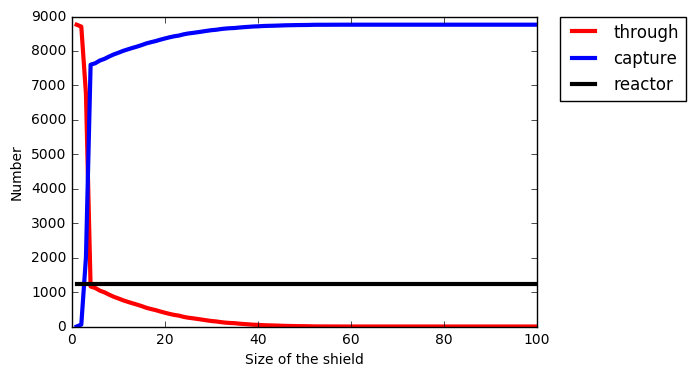

In [16]:
size_array=np.array(size)
through_array=np.array(through_n)
capture_array=np.array(capture_n)
reactor_array=np.array(reactor_n)
plt.plot(size_array,through_array,'-',label='through',color='red',linewidth=3.0)
plt.plot(size_array,capture_array,'-',label='capture',color='blue',linewidth=3.0)
plt.plot(size_array,reactor_array,'-',label='reactor',color='black',linewidth=3.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Size of the shield')
plt.ylabel('Number')
plt.show()





In [17]:
P_through=through_array/sample
P_capture=capture_array/sample
P_reactor=reactor_array/sample

In [18]:
m_through,b_through=np.polyfit(size,np.log(P_through),1)
print(m_through,b_through)


fit_t=m_through*size+b_through
uncertainty_t=(1/tmax)*np.sum((fit_t-np.log(P_through))**2)#Standard Deviation
print(math.sqrt(uncertainty_t))

-0.195686304159 0.42688230475
2.0705876086276374


In [19]:
m_capture,b_capture=np.polyfit(size,np.log(P_capture),1)
print(m_capture,b_capture)


fit_c=m_capture*size+b_capture
uncertainty_c=(1/tmax)*np.sum((fit_t-np.log(P_capture))**2)#Standard Deviation
print(math.sqrt(uncertainty_c))

0.0141309585981 -1.09049098381
11.03219998567729


In [20]:
m_reactor,b_reactor=np.polyfit(size,np.log(P_reactor),1)
print(m_reactor,b_reactor)


fit_t=m_reactor*size+b_reactor
uncertainty_r=(1/tmax)*np.sum((fit_t-np.log(P_reactor))**2)#Standard Deviation
print(math.sqrt(uncertainty_r))

3.05384592601e-18 -2.08908791873
2.3498992183808827e-16
